In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit.utils import QuantumInstance
from qiskit_ionq import IonQProvider
from qiskit.extensions import UnitaryGate


In [3]:
ionq_provider = IonQProvider('r4o7WWWCZetVsf6TgrZ95PAF4PcpATmx')
ionq_provider.backends()
aer_backend = Aer.get_backend("aer_simulator")
ionq_backend_sim = ionq_provider.get_backend('ionq_simulator') 
ionq_backend= ionq_provider.get_backend('ionq_qpu')

In [4]:
ionq_provider.backends()

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]

# Task 7

4


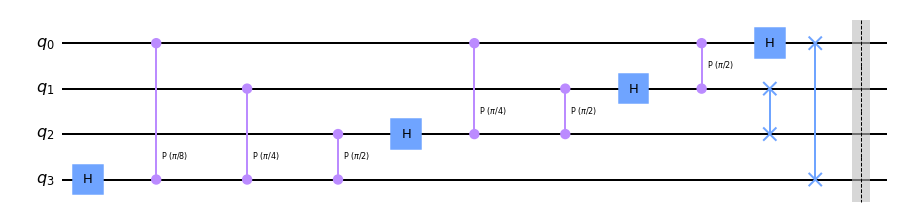

In [5]:
def qft_rot(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    qft_rot(circuit, n)
    
def swap_registers(circuit, n):
    print(n)
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rot(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.barrier()
qc.draw('mpl')




4


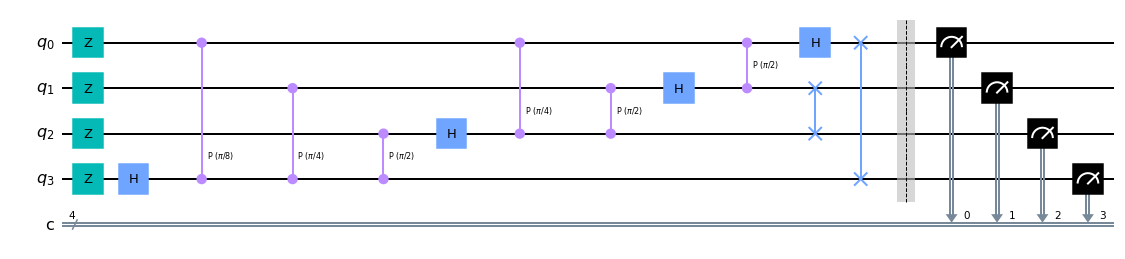

In [6]:
qc = QuantumCircuit(4,4)
qc.z(range(4))
qft(qc,4) 
qc.barrier()
qc.measure(range(4),range(4))
qc.draw('mpl')





In [7]:
aer_qc=transpile(qc,aer_backend)
ionqsim_qc=transpile(qc,ionq_backend_sim)
ionq_qc=transpile(qc,ionq_backend)

shots=10000
aer_obj = assemble(aer_qc, shots=shots)




job_aer = aer_backend.run(aer_obj)
job_ionqsim=ionq_backend_sim.run(ionqsim_qc)
job_ionq=ionq_backend.run(ionq_qc)

In [46]:
aer_result=job_aer.result()
ionqsim_result=job_ionqsim.result()
ionq_result=job_ionq.result()

In [47]:
aer_pros = aer_result.get_counts()
ionqsim_pros=ionqsim_result.get_counts()
ionq_pros=ionq_result.get_counts()

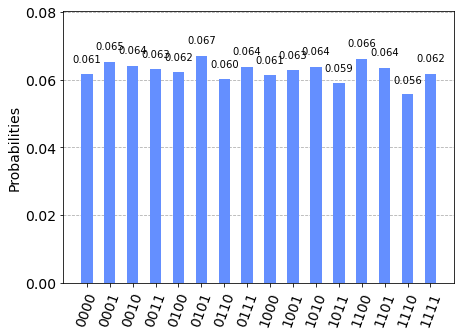

In [48]:
from qiskit.visualization import plot_histogram
plot_histogram(aer_pros)



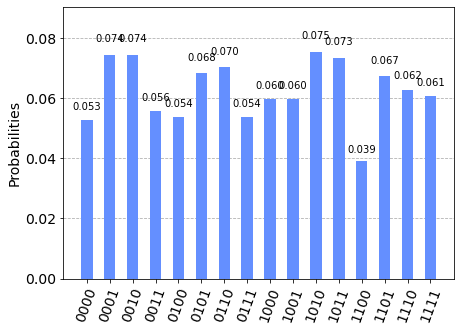

In [49]:
plot_histogram(ionqsim_pros)

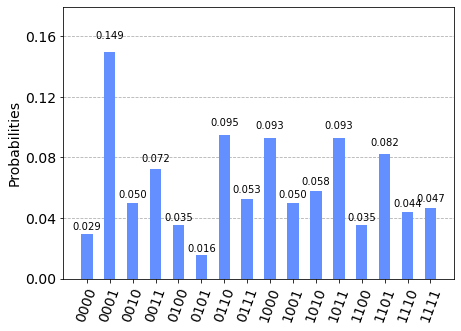

In [50]:
plot_histogram(ionq_pros)

# Task 8

In [64]:
from qiskit.converters import circuit_to_gate
def QPE( n, m, U, psi):
    Ugate=UnitaryGate(U, label='U')
    CUgate=Ugate.control(1)
    qc=QuantumRegister(n, name='qc')
    psic=QuantumRegister(m, name='psi')
    c=ClassicalRegister(n)
    circuit=QuantumCircuit(qc,psic,c)
    circuit.h(qc)
    circuit.initialize(psi, psic[:])
    circuit.barrier()
    for i in range(n):
        for j in range(2**i):
            circuit.append(CUgate,[qc[i],psic[:]])
    qftc = QuantumCircuit(n)
    qft(qftc,n)
    QFT_Gate=circuit_to_gate(qftc,label='QFT')
    IQFT_Gate=QFT_Gate.inverse()
    IQFT_Gate.label= "Inverse_QFT"
    circuit.append(IQFT_Gate,qc[:])
    circuit.measure(qc[:],c[:])
    return circuit
    

# Task 9

3


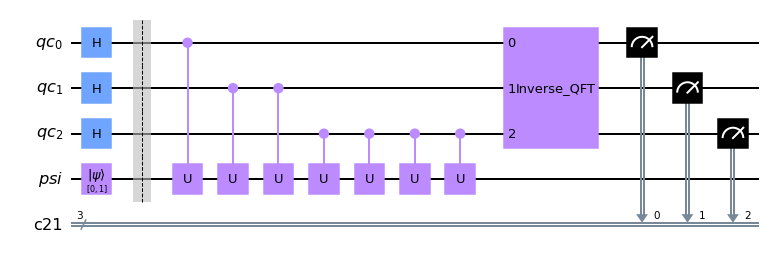

In [65]:
n=3
m=1
U=[[1,0],
   [0, 1j]]
psi=[0,1]
circuit=QPE( n, m, U, psi)
circuit.draw('mpl')

In [66]:
aer_qc2=transpile(qc,aer_backend)
ionqsim_qc2=transpile(qc,ionq_backend_sim)
ionq_qc2=transpile(qc,ionq_backend)

shots=10000
aer_obj2 = assemble(aer_qc2, shots=shots)




job_aer2 = aer_backend.run(aer_obj2)
job_ionqsim2=ionq_backend_sim.run(ionqsim_qc2)
job_ionq2=ionq_backend.run(ionq_qc2)
aer_result2=job_aer2.result()
ionqsim_result2=job_ionqsim2.result()
ionq_result2=job_ionq2.result()
aer_pros2 = aer_result2.get_counts()
ionqsim_pros2=ionqsim_result2.get_counts()
ionq_pros2=ionq_result2.get_counts()

In [ ]:
plot_histogram(aer_pros2)

In [ ]:
plot_histogram(ionqsim_pros2)

In [ ]:
plot_histogram(ionq_pros2)